In [368]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Exploratory Data Analysis

In [369]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [370]:
print(df.shape)
df.head()


(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [371]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [372]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can observe that the lowest value of Experience is in negative so we will take the absolute values of all the values present in Experience column

In [373]:
df['Experience'] = df['Experience'].abs()

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [374]:
df.isnull().values.any()

False

In [375]:
df.shape

(5000, 14)

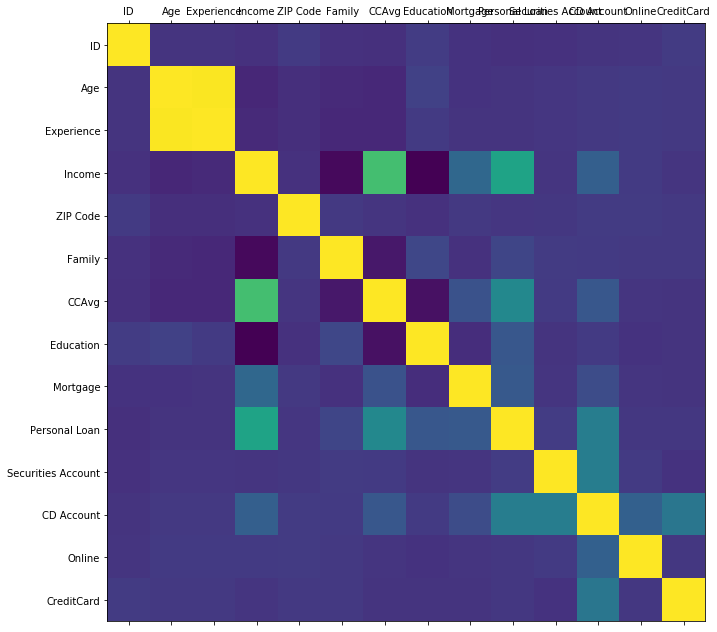

In [376]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

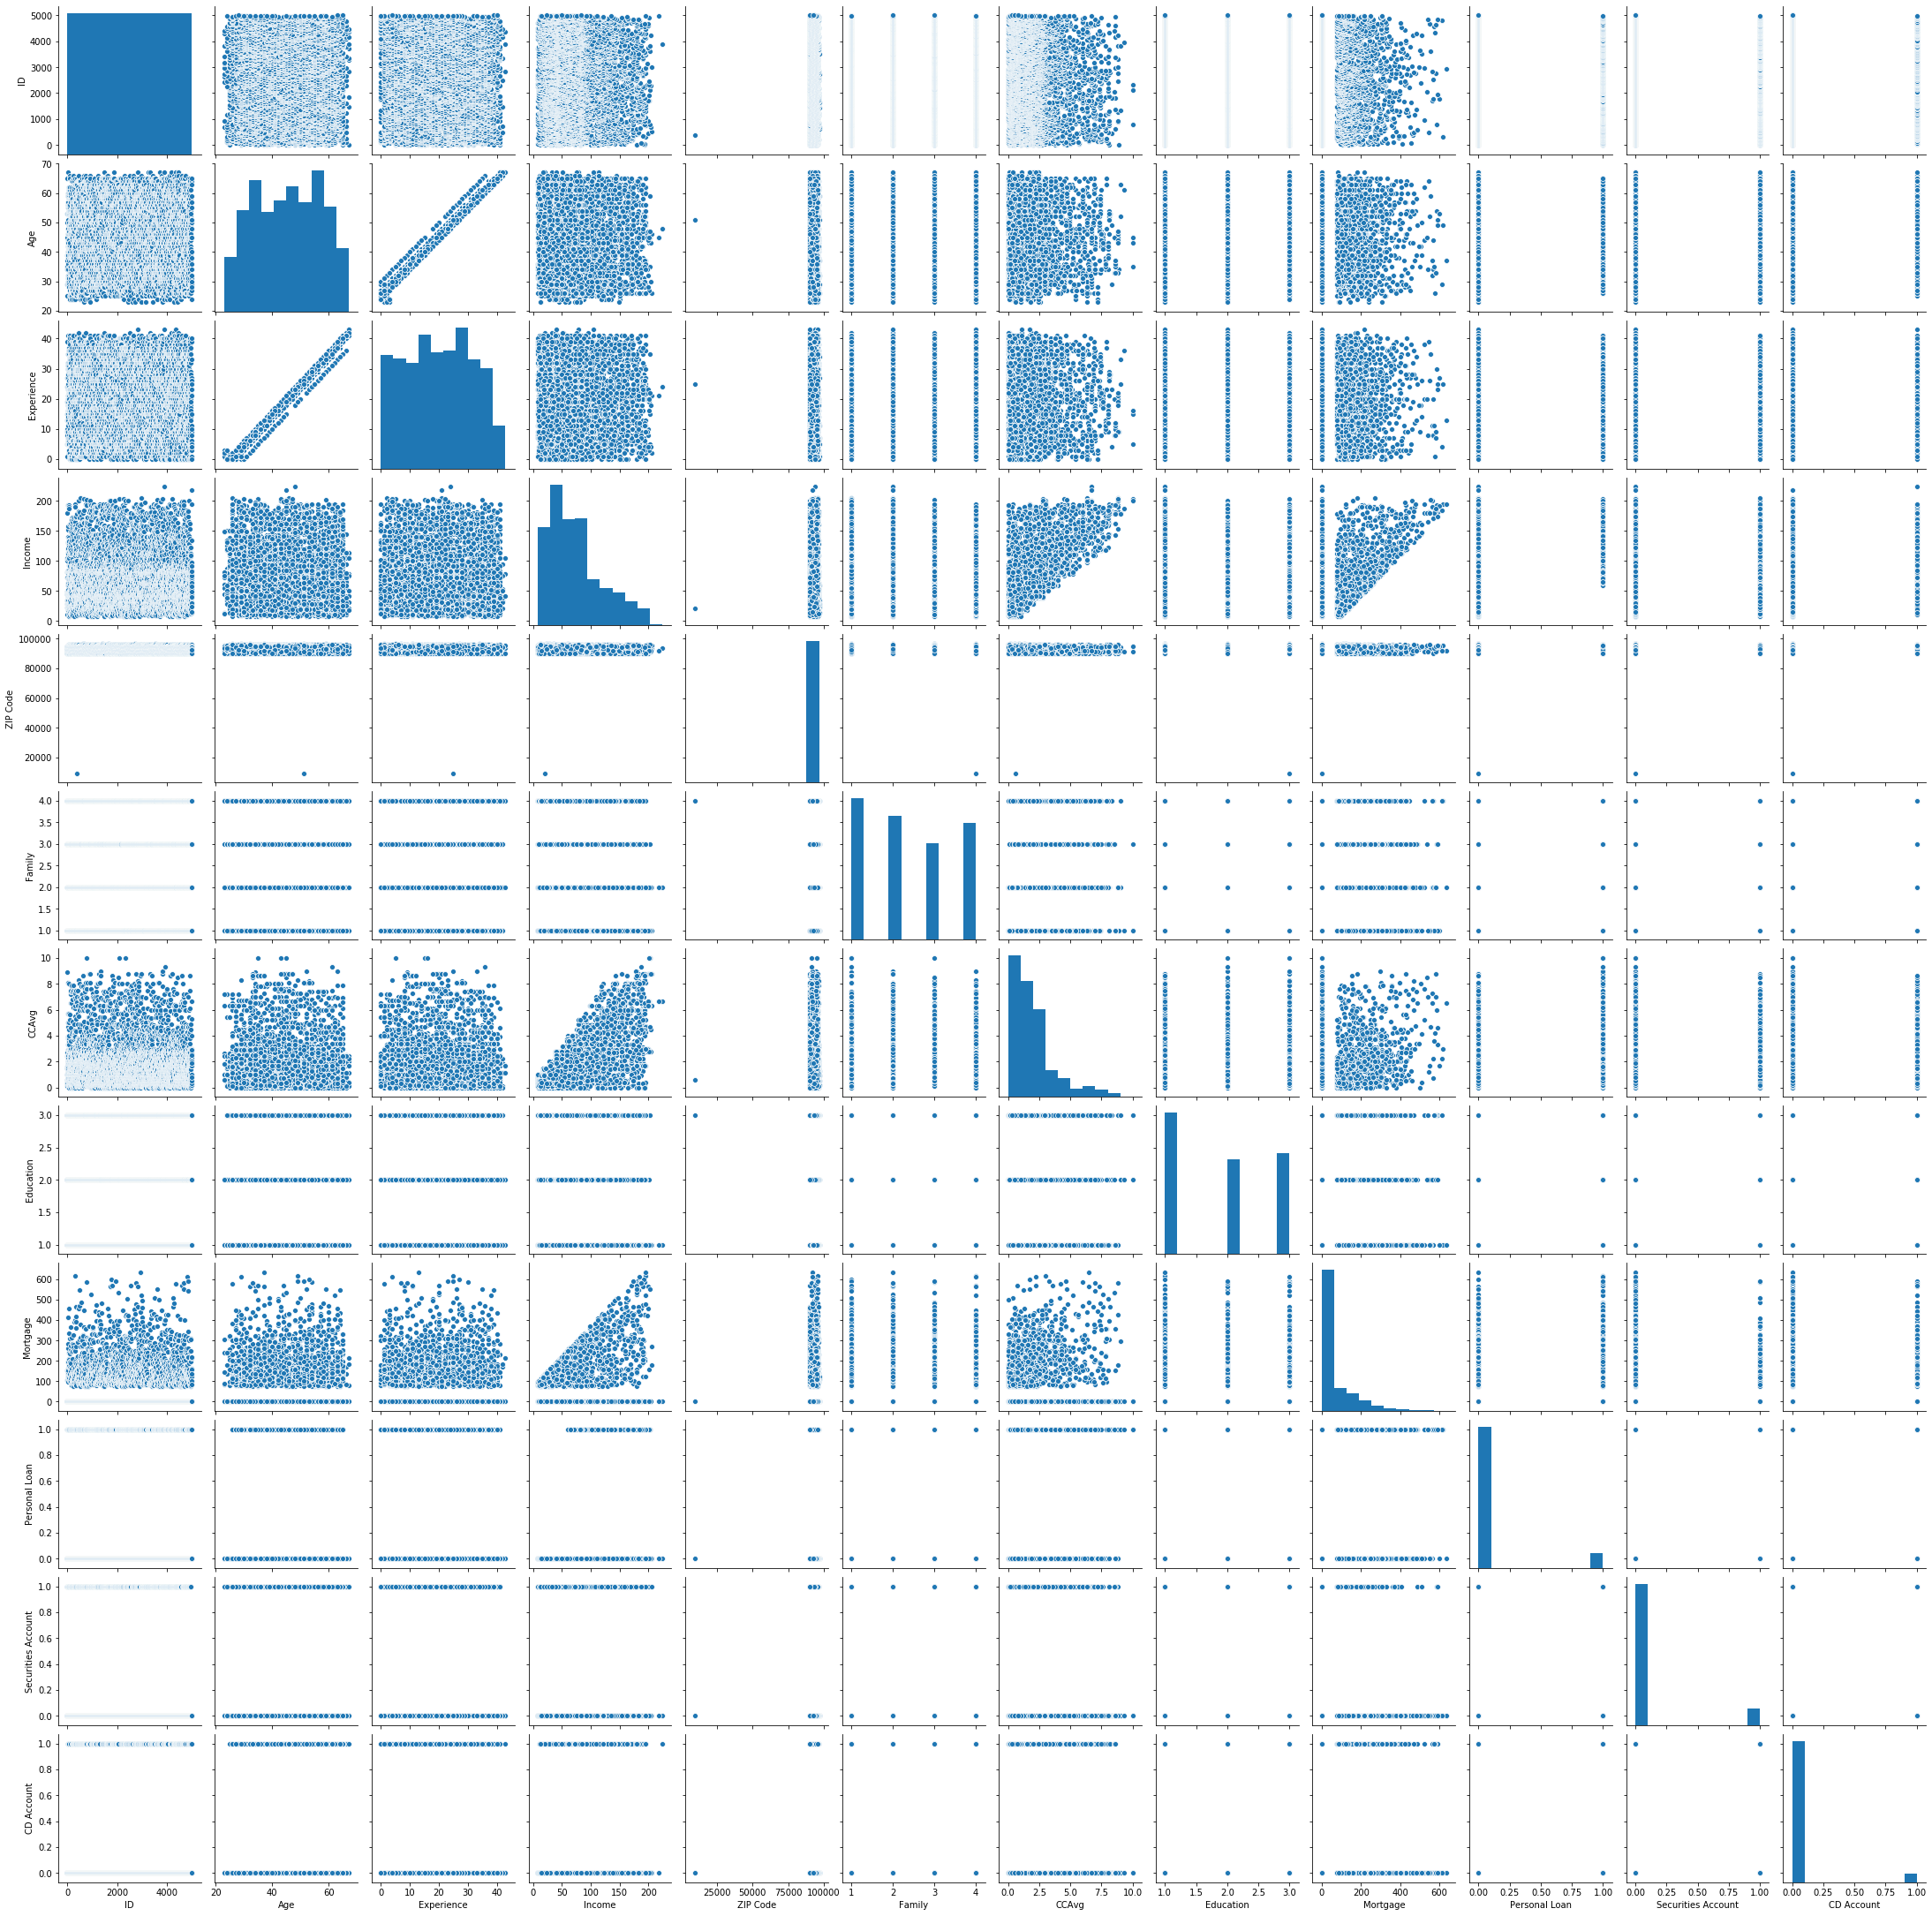

In [377]:
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)


We can observe that Age and Experience have a strong positive correlation

### Description of each attribute
#### ID: Customer ID
#### Age: Customer's age in completed years
#### Experience: #years of professional experience
#### Income: Annual income of the customer ()
#### ZIP Code: Home Address ZIP code
#### Family: Family size of customer
#### CCAvg: Avg. spending on credit cards per month
#### Education: Education Level 
####                        1. Undergrad
####                        2. Graduate
####                        3. Advanced/Professional
#### Mortrage: Value of house mortrage if any
#### Personal Loan: Did this customer accept the personal loan offered in the last campaign
#### Securities Account: Does the customer have a securities account with the bank? 
#### CD Account: Does the customer have a securities account with the bank?
#### Online: Does the customer use internet banking facilities?
#### Credit Card: Does the customer use a credit card issued by UniversalBank

## Data distribution in each attribute
### Distribution of Age

We can notice that maximum people are within the ages of 30-60 
The minimum and the maximum ages are 23 and 67 years


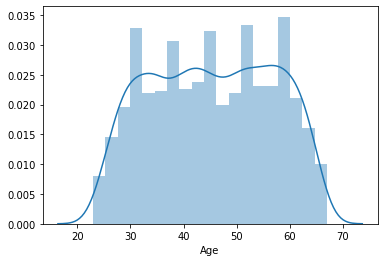

In [378]:
sns.distplot(df['Age']);
print("We can notice that maximum people are within the ages of 30-60 ")
print("The minimum and the maximum ages are {} and {} years".format(df['Age'].min(),df['Age'].max()))

### Distribution of Experience

We can notice that maximum people have an experience of 2-37 years
The minimum and maximum amount of experience is 0 and 43 years
We observe that minimum experience is -3 years, which might be fallacious.


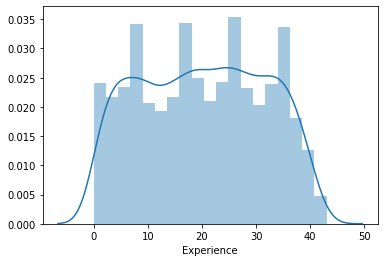

In [379]:
sns.distplot(df['Experience']);
print("We can notice that maximum people have an experience of 2-37 years")
print("The minimum and maximum amount of experience is {} and {} years".format(df['Experience'].min(),df['Experience'].max()))
print('We observe that minimum experience is -3 years, which might be fallacious.')

### Distribution of Income

We can notice maximum people have an income of $10,000-$90,000
The minimum and maximum incomes are $8,000 and $224,000


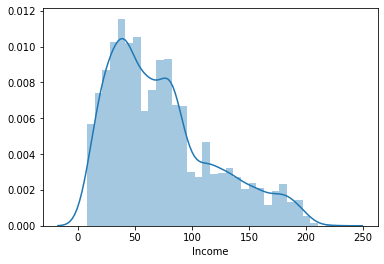

In [380]:
sns.distplot(df['Income']);
print('We can notice maximum people have an income of $10,000-$90,000')
print('The minimum and maximum incomes are ${},000 and ${},000'.format(df['Income'].min(),df['Income'].max()))

### Distribution of Family Column

In [382]:
print('Number of unique values in Family column:{}'.format(df['Family'].nunique()))
print("We can observe that Family is a categorical column")

Number of unique values in Family column:4
We can observe that Family is a categorical column


We can observe that family size of 1 is the most common and famile size of 3 the least. 


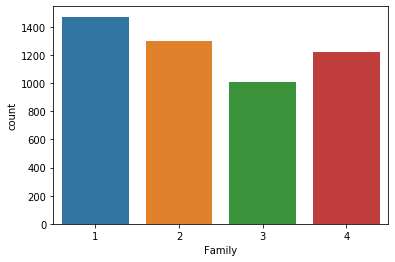

In [383]:
sns.countplot(df['Family']);
print('We can observe that family size of 1 is the most common and famile size of 3 the least. ')

### Distribution of CCAvg 

We can observe that maximum people average spending on a credit card of $0-$3,000
We can observe the minimum and maximum values of CCAvg are $0.0k and $10.0k


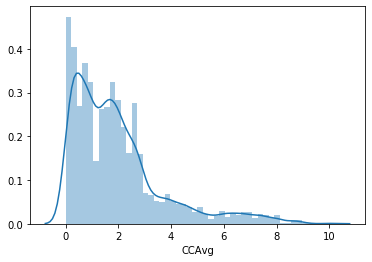

In [384]:
sns.distplot(df['CCAvg']);
print('We can observe that maximum people average spending on a credit card of $0-$3,000')
print('We can observe the minimum and maximum values of CCAvg are ${}k and ${}k'.format(df['CCAvg'].min(),df['CCAvg'].max()))

### Distribution of Education

In [385]:
print('Unique Values in Education Column:1,2,3')
print('We will replace 1,2,3 by Undergrad,Graduate,Advanced/Professional')
df['Education']=df['Education'].replace({1:'Undergraduate',2:'Graduate',3:'Advanced/Professional'})
print('Unique Values after replacement:{}'.format(df['Education'].unique()))


Unique Values in Education Column:1,2,3
We will replace 1,2,3 by Undergrad,Graduate,Advanced/Professional
Unique Values after replacement:['Undergraduate' 'Graduate' 'Advanced/Professional']


We can observe that maximum number of people are undergraduates while Graduates and ADvanced/Professional are almost equal but Graduates are less in number


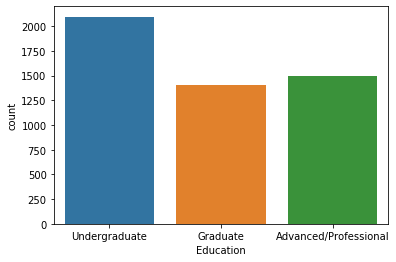

In [386]:
sns.countplot(df['Education']);
print('We can observe that maximum number of people are undergraduates while Graduates and ADvanced/Professional are almost equal but Graduates are less in number')


### Distribution of Mortgage Column

### Distribution of Securities Account

We can observe that number of people who have securities account is less than people who don't.
Number of people who have a securities account=522
Number of people who do not have a securities account=4478


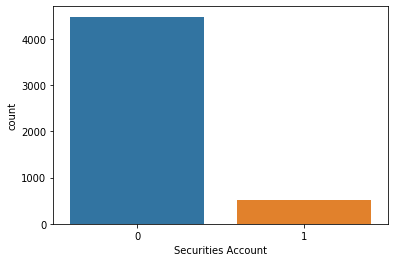

In [388]:
sns.countplot(df['Securities Account'])
print('We can observe that number of people who have securities account is less than people who don\'t.\nNumber of people who have a securities account={}\nNumber of people who do not have a securities account={}'.format(df[df['Securities Account']==1].count()[0],df[df['Securities Account']==0].count()[0]))

### Distribution of CD Account Column

We can observe that the number of people who have a CD account are lower than the number of people who do not have a
CD account.
Number of people who have a CD Account=302
Number of people who do not have a CD Account=4698


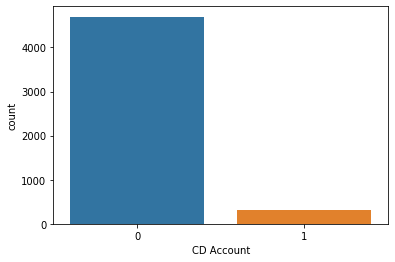

In [389]:
sns.countplot(df['CD Account'])
print('We can observe that the number of people who have a CD account are lower than the number of people who do not have a\nCD account.\nNumber of people who have a CD Account={}\nNumber of people who do not have a CD Account={}'.format(df[df['CD Account']==1].count()[0],df[df['CD Account']==0].count()[0]))

### Distribution of Online Column

We can observe that the number of customers who use internet banking facilities are more than those who do not.
Number of customers who use internet banking facilities=2984
Number of customers who do not use internet banking facilities=2016


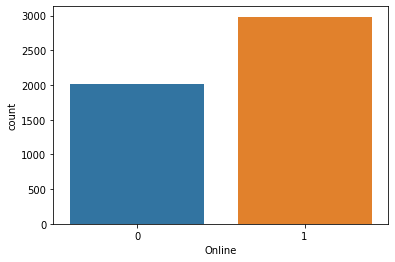

In [390]:
sns.countplot(df['Online'])
df[df['Online']==1].count()[0]
df[df['Online']==0].count()[0]
print('We can observe that the number of customers who use internet banking facilities are more than those who do not.\nNumber of customers who use internet banking facilities={}\nNumber of customers who do not use internet banking facilities={}'.format(df[df['Online']==1].count()[0],df[df['Online']==0].count()[0]))

### Distribution of CreditCard Column

We can observe that the number of customers who use credit card is lower than the number of people who do not.
Number of customers who use a credit card=1470
Number of customers who do not use a credit card=3530


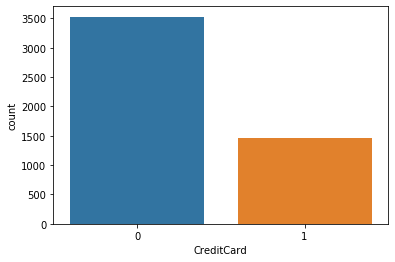

In [391]:
sns.countplot(df['CreditCard'])
print('We can observe that the number of customers who use credit card is lower than the number of people who do not.\nNumber of customers who use a credit card={}\nNumber of customers who do not use a credit card={}'.format(df[df['CreditCard']==1].count()[0],df[df['CreditCard']==0].count()[0

]))

## Target Column Distribution

### Distribution of Personal Loan Column

We can observe that the number of people who accepted are lower than those who did not accept.
People who accepted loan=480 (9.6%)
People who did not accept loan=4520 (90.4%)


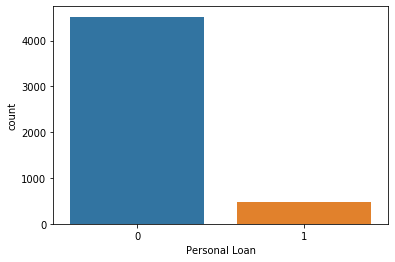

In [392]:
sns.countplot(df['Personal Loan'])
print('We can observe that the number of people who accepted are lower than those who did not accept.')
print('People who accepted loan={} ({}%)'.format(yes_loan,percent_yes))
print('People who did not accept loan={} ({}%)'.format(no_loan,percent_no))

We can observe that the data is unevenly distributed for Personal Loan column, which is our target variable.
Number of people who accepted loan are almost 90% whereas those who did not are ~10%

## Splitting Dataset into Training and Testing set (70:30)

#### Before splitting the dataset into training and testing sets, we need to create dummy variables for "Education" Column

In [393]:
df = pd.get_dummies(df, columns=['Education'])
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate,Education_Undergraduate
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [394]:
from sklearn.model_selection import train_test_split

X=df.drop(['Personal Loan','Education_Undergraduate'],axis=1) #Independent Variables
Y=df['Personal Loan']             #Dependent Variable


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/Professional,Education_Graduate
1334,1335,47,22,35,94304,2,1.3,0,0,0,1,0,0,0
4768,4769,38,14,39,93118,1,2.0,0,0,0,1,0,0,1
65,66,59,35,131,91360,1,3.8,0,0,0,1,1,0,0
177,178,29,3,65,94132,4,1.8,244,0,0,0,0,0,1
4489,4490,39,13,21,95518,3,0.2,0,0,0,1,0,0,1


We can observe that x_train does not contain "Personal Load" column, since we have removed the column as it is a target or "dependent column", which means that "Personal Loan" is dependent on variables in X.

In [395]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [396]:
print("Loan Accepted in Original Data           : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Loans not Accepted in Original Data      : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Data Loan Accepted Values       : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Data Loan not Accepted Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Testing Data Loan Accepted Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Testing Data Loan not Accepted Values    : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))


Loan Accepted in Original Data           : 480 (9.60%)
Loans not Accepted in Original Data      : 4520 (90.40%)

Training Data Loan Accepted Values       : 331 (9.46%)
Training Data Loan not Accepted Values   : 3169 (90.54%)

Testing Data Loan Accepted Values        : 149 (9.93%)
Testing Data Loan not Accepted Values    : 1351 (90.07%)


## Logistic Regression

In [397]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model1 = LogisticRegression(solver="liblinear")
model1.fit(x_train, y_train)
#predict on test
y_predict1 = model.predict(x_test)

coef_df1 = pd.DataFrame(model.coef_)
coef_df1['intercept'] = model.intercept_
print(coef_df1)

          0        1         2         3         4         5         6  \
0 -0.000037 -0.00044 -0.000479  0.036117 -0.000064  0.000838  0.001483   

          7         8         9        10        11        12        13  \
0  0.000864  0.000032  0.000346  0.000004  0.000004  0.000323  0.000313   

   intercept  
0  -0.000006  


### Model Evaluation

In [398]:
model_score1 = model1.score(x_test, y_test)
print(model1_score)
print(metrics.confusion_matrix(y_test,y_predict1))

0.9073333333333333
[[1318   33]
 [ 106   43]]


In [399]:
print(metrics.classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



,Predict 1,Predict 0
Actual 1,43,106
Actual 0,33,1318


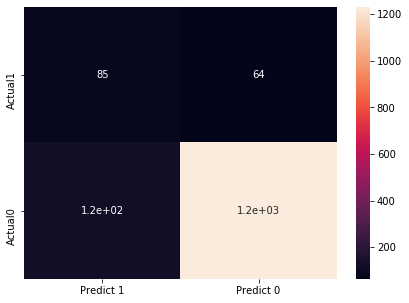

In [400]:
cm1=metrics.confusion_matrix(y_test, y_predict1, labels=[1, 0])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm1

## KNN

In [401]:
from sklearn.neighbors import KNeighborsClassifier
scoresknn=[]
for k in range(1,100):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(x_train,y_train)
    scoresknn.append(NNH.score(x_test,y_test))



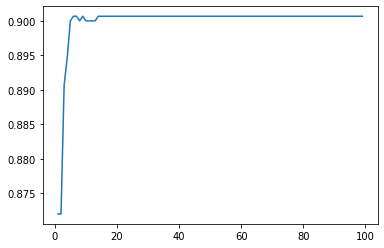

In [402]:
plt.plot(range(1,100),scoresknn)

In [403]:
NNH2 = KNeighborsClassifier(n_neighbors= 55, weights = 'distance' )
# Call Nearest Neighbour algorithm
#We chose 55 since it's apparent from the curve that we get a good score at 55 and it's closer to sqrt(n).
NNH2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=55, p=2,
                     weights='distance')

### Model Evaluation

In [404]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels2 = NNH2.predict(x_test)
NNH2.score(x_test, y_test)

0.9006666666666666

In [405]:
print(metrics.confusion_matrix(y_test,predicted_labels2))

[[1351    0]
 [ 149    0]]


In [406]:
print(metrics.classification_report(y_test,predicted_labels2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



C:\Users\Kushagra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [407]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)
NNH.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=99, p=2,
                     weights='distance')

In [408]:
predicted_labels22 = NNH.predict(x_test_scaled)

In [409]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1351    0]
 [ 149    0]]


In [410]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



C:\Users\Kushagra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes Model

In [411]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model3 = GaussianNB()

model3.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Model Evaluation

### Training Data Performance

In [412]:
model_predict3 = model3.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, model_predict3)))
print()

Model Accuracy: 0.8923



### Testing Data Performance

In [413]:
model_predict32=model3.predict(x_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, model_predict32)))
print()

Model Accuracy: 0.8767



Confusion Matrix


,Predict 1,Predict 0
Actual1,85,64
Actual0,121,1230


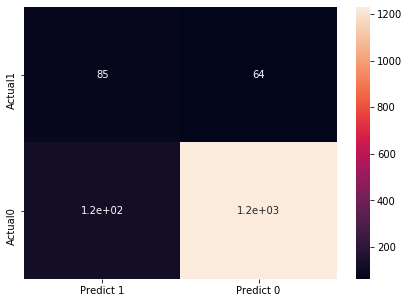

In [414]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, model_predict32, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual1","Actual0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [415]:
print(metrics.classification_report(y_test,model_predict32))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.89      1500



## Confusion Matrix and Classification Report for all the methods

### 1.Logistic Regression

In [416]:
print("Confusion Matrix of Logistic Regression:")
print(df_cm1)
print('')
print('')
print("Classification report of Logistic Regression:")
print(metrics.classification_report(y_test,y_predict1))

Confusion Matrix of Logistic Regression:
          Predict 1  Predict 0
Actual 1         43        106
Actual 0         33       1318


Classification report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



### 2.K-Nearest Neighbours

In [417]:
print("Confusion Matrix of KNN:")
print(pd.DataFrame(metrics.confusion_matrix(y_test,predicted_labels2),columns=['Predict 0','Predict 1'],index=['Actual 0','Actual1']))
print('')
print('')
print("Classification Report of KNN:")
print(metrics.classification_report(y_test,predicted_labels2))

Confusion Matrix of KNN:
          Predict 0  Predict 1
Actual 0       1351          0
Actual1         149          0


Classification Report of KNN:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



C:\Users\Kushagra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3. Naive Bayes Classifier

In [418]:
print("Confusion Matrix of NB")
print(df_cm)
print('')
print('')
print("Classification report of NB:")
print(metrics.classification_report(y_test,model_predict32))

Confusion Matrix of NB
         Predict 1  Predict 0
Actual1         85         64
Actual0        121       1230


Classification report of NB:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.89      1500



## Final Discussion

We tried 3 different algorithms, namely Logistic Regression, K-Nearest Neighbours and Naive Bayes Classifier.
We observe that K-Nearest Neighbours gave an accuracy of 90%, but a precision and recall of 0. So we do not even consider that model.
Amongst Naive Bayes and Logistic Regression,Logistic Regression gives a higher accuracy. But since Naive Bayes has a Recall and F1 score significantly greater than that of Logistic Regression, we can conclude that Naive Bayes is the best algorithm to choose for this particular problem

In [419]:
i = 1
while True: 
    if i%3 == 0: 
        break
    print(i) 
    i + = 1
    

SyntaxError: invalid syntax (<ipython-input-419-34683335b915>, line 6)

In [420]:
smallest_number = 0
number_data =[10,15,30,14,18,54,10,99]
for i in number_data:
    if smallest_number>i:
        smallest_number=i
print(smallest_number)

0


In [422]:
from post.model import *
m = post.models.filter(post_heading='post1')
m

ModuleNotFoundError: No module named 'post'

In [423]:
def _str_(self):
    return self.post_heading

In [427]:
_str_('hello')

AttributeError: 'str' object has no attribute 'post_heading'

In [431]:
class Post(models.Model):
    post_heading=models.CharField(max_length=200)
    post_text=models.TextField()
    post_author=models.CharField(max_length=100,default='anonymous')

    

NameError: name 'models' is not defined

In [432]:
def _str_(self):
    return self.post_heading